In [8]:
# !pip install seaborn

In [1]:
import ipywidgets
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import sys
from pathlib import Path

In [7]:
DATA = Path('data')

df = pd.read_csv(DATA/'ae_data.csv',encoding='utf8')
df.head()

,id,seq,topWait,hospTime,hospCoord,hospUrlB5,hospUrlEn,hospUrlGb,pastHours,hospNameB5,hospNameEn,hospNameGb,hospTimeEn
0,QMH 21/2/2019 9:00am,HK-02,> 2,2019-02-21T09:00:09.29,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 9:00am
1,AHN 21/2/2019 10:00am,NT-01,> 1,2019-02-21T10:00:01.783,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 10:00am
2,QMH 21/2/2019 11:00am,HK-02,> 1,2019-02-21T11:00:11.893,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 11:00am
3,AHN 21/2/2019 12:00pm,NT-01,> 1,2019-02-21T12:00:02.256,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 12:00pm
4,PYN 21/2/2019 12:00pm,HK-01,> 3,2019-02-21T12:00:01.646,POINT(114.235707 22.269419),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,東區尤德夫人那打素醫院,Pamela Youde Nethersole Eastern Hospital,东区尤德夫人那打素医院,21/2/2019 12:00pm


In [15]:
df['topWaitTime'] = df['topWait'].copy()
df['topWaitTime']  = df['topWaitTime'].str.replace('> ', '')
df['topWaitTime'][df['topWaitTime']== '< 1'] = 0.5
df['topWaitTime'] = df['topWaitTime'].fillna(0)
df['topWaitTime'] = df['topWaitTime'].astype(float)

/home/nok/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_mean = df[['topWaitTime','hospNameEn']].groupby(['hospNameEn']).mean()

In [20]:
df_mean = df_mean.reset_index()
df_mean.head()

,hospNameEn,topWaitTime
0,Alice Ho Miu Ling Nethersole Hospital,1.639167
1,Caritas Medical Centre,1.424722
2,Kwong Wah Hospital,3.183787
3,North District Hospital,3.089722
4,North Lantau Hospital,0.795114


In [34]:
@ipywidgets.interact
def plot(color=['red','steelblue']):
         (sns.barplot(y='hospNameEn',
             x='topWaitTime',
             data=df_mean,
             orient='h',
             color=color)
 .set_title('Average waiting Time of Accident & Emergency waiting Time in HK Hospital'))
    
         

interactive(children=(Dropdown(description='color', options=('red', 'steelblue'), value='red'), Output()), _do…

Text(0.5, 1.0, 'Average waiting Time of Accident & Emergency waiting Time in HK Hospital')

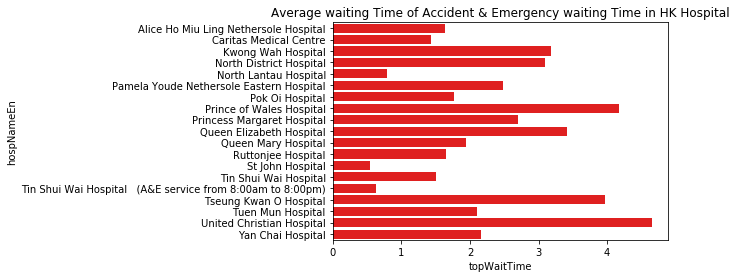

In [30]:
(sns.barplot(y='hospNameEn',
             x='topWaitTime',
             data=df_mean,
             orient='h',
             color='red')
 .set_title('Average waiting Time of Accident & Emergency waiting Time in HK Hospital'))
    